# Assignment 02

Name: Riyanshi Goyal

Roll Number: 12041240

References Used to Complete the Assignment

1. https://towardsdatascience.com/ 
2. https://www.geeksforgeeks.org/
3. https://machinelearningmastery.com/
4. https://medium.com/
5. https://scikit-learn.org/stable/
6. https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/
7. https://www.ritchieng.com/
8. class notes



## Part A: Multi-Class Classification

Captchas were invented to prevent bots from attacking websites. But the ML models are breaking captchas. Thus, stronger captchas are being invented. In this part, we will train a ML model to break hcaptcha (https://www.hcaptcha.com/ )!!

Please download the following dataset: https://github.com/sarang-iitb/H-captcha-dataset

### 0. Load the dataset

In [ ]:
# cloning
!git clone https://github.com/sarang-iitb/H-captcha-dataset

Cloning into 'H-captcha-dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('/content/H-captcha-dataset/hcaptcha_dataset.zip')

### 1. Data Cleaning and Visualization

a) Check out the labels in the dataset. How many images belong to each class?

In [ ]:
import os
li_train = os.listdir("/content/hcaptcha_dataset/train")
li_test = os.listdir("/content/hcaptcha_dataset/test")
print("labels in the given dataset are: ", li_train )

labels in the given dataset are:  ['bicycle', 'boat', 'motorbus', 'airplane', 'motorcycle', 'truck', 'seaplane']


In [ ]:
#for train dataset
for label in li_train:
  count=0
  x= os.listdir("/content/hcaptcha_dataset/train/"+label)
  for i in x:
    count+=1
  print("Number of images in class",label,": ",count)

Number of images in class bicycle :  304
Number of images in class boat :  528
Number of images in class motorbus :  256
Number of images in class airplane :  402
Number of images in class motorcycle :  592
Number of images in class truck :  656
Number of images in class seaplane :  280


In [ ]:
#for test dataset
for label in li_test:
  count_test=0
  x= os.listdir("/content/hcaptcha_dataset/test/"+label)
  for i in x:
    count_test+=1
  print("Number of images in class",label,": ",count_test)

Number of images in class bicycle :  71
Number of images in class boat :  134
Number of images in class motorbus :  61
Number of images in class airplane :  101
Number of images in class motorcycle :  141
Number of images in class truck :  163
Number of images in class seaplane :  75


b) How many train and test images are present in your dataset? 

In [ ]:
#for train data
cnt_train=0
for label in li_train:
  x= os.listdir("/content/hcaptcha_dataset/train/"+label)
  for i in x:
    cnt_train+=1
print("Number of images in train dataset: ",cnt_train)

Number of images in train dataset:  3018


In [ ]:
#for test data
cnt_test=0
for label in li_train:
  x= os.listdir("/content/hcaptcha_dataset/test/"+label)
  for i in x:
    cnt_test+=1
print("Number of images in test dataset: ",cnt_test)

Number of images in test dataset:  746


c) Write a function to display a random image and its shape. Find out whether
the shape of each image is the same or not. If not then make all images of the
same shape.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import random

truck


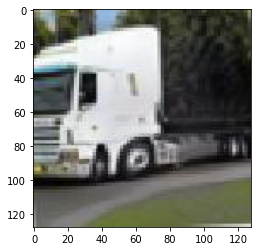

(128, 128, 3)


In [ ]:
# display a random image
type_ls=random.choice(['train','test'])
tls= os.listdir("/content/hcaptcha_dataset/"+type_ls) 
rand_label=random.choice(tls)
print(rand_label)
a= os.listdir("/content/hcaptcha_dataset/"+type_ls+"/"+rand_label) 
b=random.choice(a) 
rand_image = plt.imread('/content/hcaptcha_dataset/train/'+rand_label+'/'+b)
plt.imshow(rand_image)
plt.show()
print(rand_image.shape) 

In [ ]:
#the shape of most of the images is same ie (128,128,3) but there are a few images whose shape is different. So we need to make the shape of all the images same ie (128,128,3)

#for train data
for label in li_train:
  x= os.listdir("/content/hcaptcha_dataset/train/"+label)
  for i in x:
    pil_im = Image.open('/content/hcaptcha_dataset/train/'+label+'/'+i)
    out = pil_im.resize((128,128))
    out.save('/content/hcaptcha_dataset/train/'+label+'/'+i)

#for test data
for label in li_test:
  x= os.listdir("/content/hcaptcha_dataset/test/"+label)
  for i in x:
    pil_im = Image.open('/content/hcaptcha_dataset/test/'+label+'/'+i)
    out = pil_im.resize((128,128))
    out.save('/content/hcaptcha_dataset/test/'+label+'/'+i)


d) Do you think removing color channels (R, G, B) from images would lead to
poor modeling? How can you justify converting each image to greyscale? What
will be the effect of using a colored 3-channel image over a grayscale one on the
classification model’s performance?

In [ ]:
# It depends on your object of classification. 
# Since, in our model, color has not much signinficance as all the vehicles can have any color. Colors can't signify any particular label. 
# the shape of the vehicles is more significant
# So, since color has no significance in your images to classify then its better to go for grey scale images to avoid false classification and complexities.
# Also since a RGB image has 3 dimensions and grayscale has just one, so, everything tend to be more costly when using colored 3-channel image.


In [ ]:
lst= os.listdir("/content/hcaptcha_dataset")

for it in lst:
  li_t= os.listdir("/content/hcaptcha_dataset/"+it)
  for label in li_t:
    x= os.listdir("/content/hcaptcha_dataset/"+it+"/"+label)
    for i in x:
      img = Image.open('/content/hcaptcha_dataset/'+it+'/'+label+'/'+i)
      ImageOps.grayscale(img).save('/content/hcaptcha_dataset/'+it+'/'+label+'/'+i)


e) Should you normalize your color channel values? Based on your answers do
the steps you think will be best for your model.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#yes, the channel values should be normalized
import torch
import torchvision
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.5],
        std=[0.5],
    ),
])
for it in lst:
  li_t= os.listdir("/content/hcaptcha_dataset/"+it)
  for label in li_t:
    x= os.listdir("/content/hcaptcha_dataset/"+it+"/"+label)
    for i in x:
      img = cv2.imread('/content/hcaptcha_dataset/'+it+'/'+label+'/'+i)
      img_norm = cv2.normalize(img, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
      cv2.imwrite('/content/hcaptcha_dataset/'+it+'/'+label+'/'+i,img_norm)

f) Visualize 3 random training images along with the labels for each class. The
dataset was manually labeled, do you spot any errors in the labels?

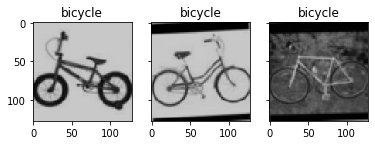

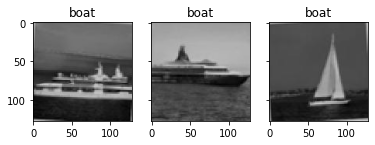

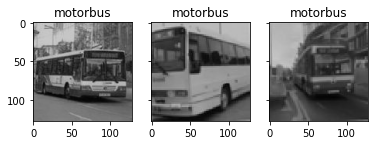

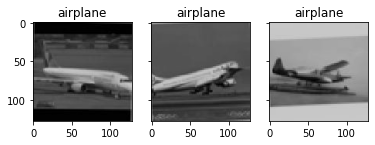

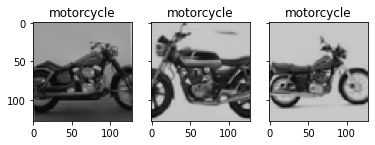

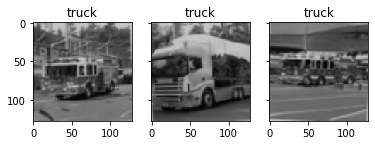

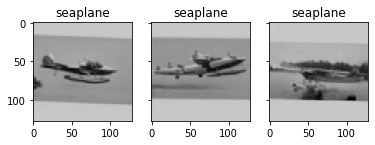

In [ ]:
for label in li_train:
  x= os.listdir("/content/hcaptcha_dataset/train/"+label)
  fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
  for ax, interp in zip(axs, [label,label,label]):
    r_choose=random.choice(x)
    r_img = cv2.imread('/content/hcaptcha_dataset/train/'+label+'/'+r_choose)
    ax.set_title(interp)
    ax.imshow(r_img)
  plt.show()

In [ ]:
#yes, we saw some errors in the labelling of the data as it was manually labelled. For eg. there were some images which were supposed to be labelled 
#as seaplanes but were labelled as airplanes

### 2. Preparing Balanced Samples for Training using only the Training set provided to you.

a) Do you think if you apply cross-validation to the dataset then all the crossvalidation folds will be similar? Why or why not?

In [ ]:
#No, all the cross-validation folds will not be similar as all the labels have different number of images in them.
#So when each label is divided into k number of folds, then each fold of a label will have diffrent sizes and won't be similar.

b) What can you do to ensure that every fold contains images from each class and no duplicates? Do the needful on your dataset that will ensure similar crossvalidation folds.

In [ ]:
# In order to  accomplish this:
# For training data ->  we will put all the training images from all the classes in a list and their corresponding labels in another list. Then shuffle both the list while 
# zipping them so that images and their corresponding labels will remain together. In this way, we will have all the training images in random order that can be used to make fold 
# of uniform distribution.
# Do the same for test images as well.

##train data

In [ ]:
PATH = "hcaptcha_dataset/train/"

training_data = []
training_labels = []
for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename): 
    image = cv2.imread(PATH+filename+"/"+file, cv2.IMREAD_GRAYSCALE)
    training_data.append(image)
    training_labels.append(filename)

In [ ]:
#encoding training labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_labels= label_encoder.fit_transform(training_labels)

In [ ]:
# label label no. according to their label names
#  0->airplane   1->bicycle    2->boat   3->motorbus   4->motorcycle   5->seaplane   6->truck  

1


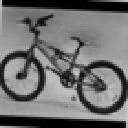

In [ ]:
my_img = Image.fromarray(training_data[20])
print(train_labels[20])
my_img

In [ ]:
import random
temp = list(zip(training_data, train_labels))
random.shuffle(temp)
t1, t2 = zip(*temp)

training_data, train_labels = list(t1), list(t2)

2


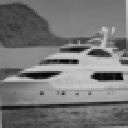

In [ ]:
data = Image.fromarray(training_data[20])
print(train_labels[20])
data

In [ ]:
train_data_flat = []
for x in range(len(training_data)):
  train_data_flat.append(training_data[x].flatten())

In [ ]:
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_flat, train_labels, test_size=0.25)
print ('X_train length:',len(X_train))
print ('y_train length:',len(y_train))
print ('X_test length:',len(X_test))
print ('y_test length:',len(y_test))

X_train length: 2263
y_train length: 2263
X_test length: 755
y_test length: 755


##test data

In [ ]:
PATH = "hcaptcha_dataset/test/" 

testing_data = []
testing_labels = []
for filename in os.listdir(PATH):
  for file in os.listdir(PATH+filename):
    image = cv2.imread(PATH+filename+"/"+file, cv2.IMREAD_GRAYSCALE)
    testing_data.append(image)
    testing_labels.append(filename)

In [ ]:
#encoding testing labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_labels= label_encoder.fit_transform(testing_labels)

In [ ]:
test_data = []
for x in range(len(testing_data)):
  test_data.append(testing_data[x].flatten())

### 3. Is Logistic regression a good algorithm for your dataset? Why or why not Based on the classification algorithms taught in class, which algorithms can be used to solve this problem?

In [ ]:
# No,logistic regression is not a good algorithm for our dataset as our dataset contains 7 labels.
# Logistic regression is by default suitable for datasets that have only two class labels. It requires modification to support multi-class classification problems

# For multiclass classification, one can use algorithms like KNN,decision trees,SVM.

### 4. Train the KNN classifier algorithm on the training dataset. Don’t use the test set at this time. 

a) What distance/similarity function should we use for comparing images?
Compare at least 3 different metrics on a few random samples to get some
understanding of how they work.

In [ ]:
#there are many distance metrics available. Some of them that we can use are: Euclidean, Manhattan, Correlation, Cosine etc.

seaplane truck


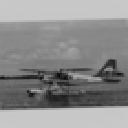

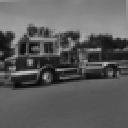

In [ ]:
l1=random.choice(li_train) 
l2=random.choice(li_train) 
print(l1,l2) 
a1= os.listdir("/content/hcaptcha_dataset/train/"+l1) 
a2= os.listdir("/content/hcaptcha_dataset/train/"+l2) 
b1=random.choice(a1) 
b2=random.choice(a2) 
p1='/content/hcaptcha_dataset/train/'+l1+'/'+b1
p2='/content/hcaptcha_dataset/train/'+l2+'/'+b2
r1 = cv2.imread(p1)
r2 = cv2.imread(p2)
cv2_imshow(r1)
cv2_imshow(r2)

In [ ]:
import numpy as np
from collections import Counter
from scipy import spatial

flat_array_1 = r1.flatten()
flat_array_2 = r2.flatten()

RH1 = Counter(flat_array_1)
RH2 = Counter(flat_array_2)
H1 = []
H2 = []
for i in range(256):
    if i in RH1.keys():
        H1.append(RH1[i])
    else:
        H1.append(0)
    if i in RH2.keys():
        H2.append(RH2[i])
    else:
        H2.append(0)

euclidean_sim = spatial.distance.euclidean(H1, H2)
manhattan_sim = spatial.distance.cityblock(H1, H2)
minkowski_sim = spatial.distance.correlation(H1, H2)
# display distance matrix
print("Euclidean Similarity:\n ", euclidean_sim)
print("\nManhattan Similarity:\n ", manhattan_sim)
print("\nCorrelation Similarity:\n ", minkowski_sim)

Euclidean Similarity:
  11517.7669710756

Manhattan Similarity:
  49098

Correlation Similarity:
  0.9335785860010894


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
metrics = ['euclidean','manhattan','correlation']
m_scores = []

for m in metrics:
    knn = KNeighborsClassifier(n_neighbors=3,metric=m)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    ans=cv_scores.mean()
    print('Mean Cross Val Score for metric=',m,': ',ans)

Mean Cross Val Score for metric= euclidean :  0.7052472210826545
Mean Cross Val Score for metric= manhattan :  0.756055988591299
Mean Cross Val Score for metric= correlation :  0.7931870128347887


b) What is the impact of increasing K on the speed and accuracy of the
algorithm? 

In [ ]:
k=[3,4,5,7,9,14]

for i in k:
  knn_cv = KNeighborsClassifier(n_neighbors = i,metric='correlation')
  cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
  knn_cv.fit(X_train,y_train)
  y_pred=knn_cv.predict(X_test)
  print('Accuracy for k=',i,': ',accuracy_score(y_test, y_pred)*100,'%')


Accuracy for k= 3 :  81.8543046357616 %
Accuracy for k= 4 :  81.58940397350993 %
Accuracy for k= 5 :  81.05960264900662 %
Accuracy for k= 7 :  80.0 %
Accuracy for k= 9 :  80.13245033112582 %
Accuracy for k= 14 :  78.67549668874172 %


The accuracy of the model :
decreases from 3 to 4
increases from 4 to 5 
and then decreases 

c) Choose a good value of K and the distance metric based on cross-validation.

###for K

In [ ]:
k_range = range(3, 25)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print("best value of k is ",k_range[k_scores.index(max(k_scores))]," with score: ",max(k_scores))

[0.7052472210826545, 0.6862538826701049, 0.6933276680536834, 0.6844839711656802, 0.6875754556643029, 0.6791820508312332, 0.6796284357967531, 0.6747670397937057, 0.6778585242923284, 0.670345191349704, 0.6694592588251382, 0.6663648440094552, 0.6584139170524917, 0.6562064115337278, 0.6495760807986091, 0.6531090664009847, 0.6433833440778293, 0.6420578639942176, 0.6380736095645549, 0.6389614956338276, 0.6385160874406611, 0.6345425775068863]
best value of k is  3  with score:  0.7052472210826545


Text(0, 0.5, 'Cross-Validated Accuracy')

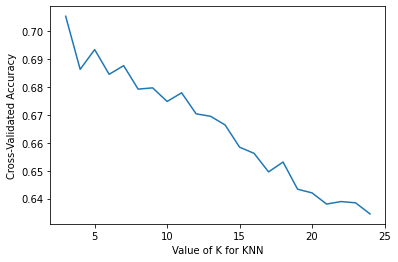

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

###for Distance metric

In [ ]:
metrics = ['euclidean','manhattan','correlation','cosine','canberra','braycurtis','sqeuclidean']
m_scores = []

for m in metrics:
    knn = KNeighborsClassifier(n_neighbors=3,metric=m)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    m_scores.append(scores.mean())
print(m_scores)
print("best metric is ",metrics[m_scores.index(max(m_scores))]," with score: ",max(m_scores))

[0.7052472210826545, 0.756055988591299, 0.7931870128347887, 0.6531110199456914, 0.7092304987399636, 0.7282296977866338, 0.7052472210826545]
best metric is  correlation  with score:  0.7931870128347887


Text(0, 0.5, 'Cross-Validated Accuracy')

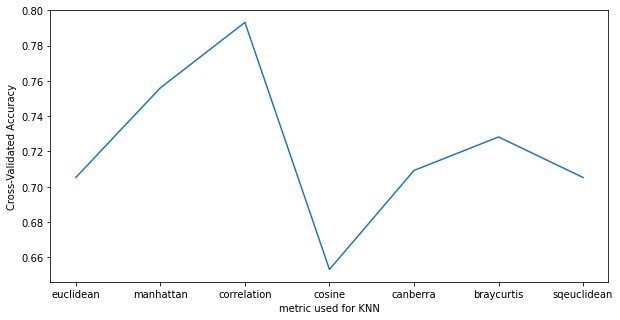

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(metrics, m_scores)
plt.xlabel('metric used for KNN')
plt.ylabel('Cross-Validated Accuracy')

### 5. Train SVM classifiers on the dataset. Don’t use the test set at this time.

a) Which kernel functions can be used for this dataset? Why?

In [ ]:
from sklearn.svm import SVC

In [ ]:
kernels = ['linear','rbf']
kernel_scores = []

for i in kernels:
    svc= SVC(kernel = i)
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
    kernel_scores.append(scores.mean())
print(kernel_scores)
print("best kernel is ",kernels[kernel_scores.index(max(kernel_scores))]," with score: ",max(kernel_scores))

[0.7512072906288461, 0.8378098810291273]
best kernel is  rbf  with score:  0.8378098810291273


In [ ]:
# model with RBF kernel is giving better accuracy as compared to that of  linear kernel.
# Moreover, rbf is used when the data is not linearly separable. So when we don't have much prior knowledge of data, it can be used.

b) Which of the SVM implementations (SVC, SGDClassifier, NuSVC and LinearSVC)
is the best for this dataset? Why?


In [ ]:
#for SVC
svc= SVC(kernel = 'rbf')
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
print('for SVC, mean cross val score: ',scores.mean())

for SVC, mean cross val score:  0.8378098810291273


In [ ]:
# #for SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd= SGDClassifier()
scores = cross_val_score(sgd, X_train, y_train, cv=5, scoring='accuracy')
print('for SGD Classifier, mean cross val score: ',scores.mean())

for SGD Classifier, mean cross val score:  0.7096866514290179


In [ ]:
#for NuSVC
from sklearn.svm import NuSVC

nusvc= NuSVC()
scores = cross_val_score(nusvc, X_train, y_train, cv=5, scoring='accuracy')
print('for SVC, mean cross val score: ',scores.mean())

for SVC, mean cross val score:  0.7675428314676982


In [ ]:
#for LinearSVC
from sklearn.svm import LinearSVC

lisvc= LinearSVC(max_iter=2000) 
scores = cross_val_score(lisvc, X_train, y_train, cv=5, scoring='accuracy')
print('for Linear SVC, mean cross val score: ',scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


KeyboardInterrupt: ignored

c) Finalize your SVM model based on cross-validation


In [ ]:
#based on cross validation scores, svc model with kernel='rbf gives the best accuracy and will be used as our final model

### 6. Evaluate and compare the classification models on the test set provided to you

a) Calculate the classification accuracy of both the models and compare

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors = 3,metric='correlation')
knn_final.fit(train_data_flat, train_labels)
y_pred_knn=knn_final.predict(test_data)

print('Accuracy of KNN model: ',accuracy_score(test_labels, y_pred_knn)*100,'%')

Accuracy of KNN model:  84.1823056300268 %


In [ ]:
svc_final = SVC(kernel = 'rbf')
svc_final.fit(train_data_flat, train_labels)
y_pred_svc=svc_final.predict(test_data)

print('Accuracy of KNN model: ',accuracy_score(test_labels, y_pred_svc)*100,'%')

Accuracy of KNN model:  88.47184986595174 %


b) Which are the two classes that were most confused by your model? What
classification evaluation metric can be used to best visualize it? Plot the
visualization for both models

In [ ]:
mistakes_knn=[]
mistakes_svc=[]
for i in range(len(test_labels)):
  if(y_pred_knn[i]!=test_labels[i]):
    mistakes_knn.append(test_labels[i])
  if(y_pred_svc[i]!=test_labels[i]):
    mistakes_svc.append(test_labels[i])

from collections import Counter
print("for KNN: ", Counter(mistakes_knn))
print("for SVC: ", Counter(mistakes_svc))


for KNN:  Counter({3: 37, 2: 21, 6: 20, 4: 19, 0: 11, 1: 7, 5: 3})
for SVC:  Counter({3: 28, 0: 16, 6: 14, 2: 12, 1: 7, 4: 7, 5: 2})


In [ ]:
# label label no. according to their label names
#  0->airplane   1->bicycle    2->boat   3->motorbus   4->motorcycle   5->seaplane   6->truck  

#from the above counter we can see,
#for KNN the most wrongly predicted class is motorbus(3) followed by boat(2)
#for SVC the most wrongly predicted class is motorbus(3) followed by airplane(0)

*   the two classes that were most confused by KNN model: are 1. Motorbus 2.boat
*   the two classes that were most confused by SVC model: are 1. Motorbus 2. airplane



In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

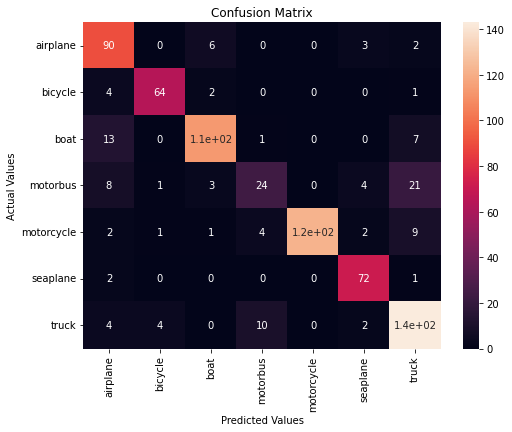

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors = 3,metric='correlation')
knn_final.fit(train_data_flat, train_labels)
y_pred_knn=knn_final.predict(test_data)
confusion_matrix_knn= confusion_matrix(test_labels, y_pred_knn)

knn_df = pd.DataFrame(confusion_matrix_knn,
                     index = ['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck'], 
                     columns = ['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck'])
plt.figure(figsize=(8,6))
sns.heatmap(knn_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

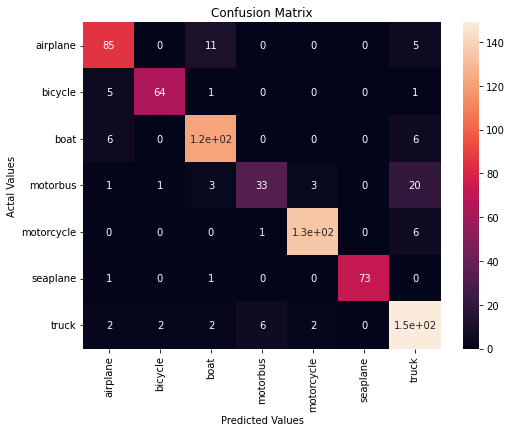

In [ ]:
svc_final = SVC(kernel = 'rbf')
svc_final.fit(train_data_flat, train_labels)
y_pred_svc=svc_final.predict(test_data)
confusion_matrix_svc= confusion_matrix(test_labels, y_pred_svc)

svc_df = pd.DataFrame(confusion_matrix_svc,
                     index = ['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck'], 
                     columns = ['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck'])
plt.figure(figsize=(8,6))
sns.heatmap(svc_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

c) Do you think you can maximize both Precision and Recall for a model? What
do you think will be a better metric to judge a model? 

In [ ]:
# No, we cannot maximize both Precision and Recall for a model. In the case of recall and precision, when we increase the recall, we decrease the precision and vice-versa.

# precision is used when we require less false positives ie. data object is negative but our model considered it as positive
# For eg. - For YouTube recommendations, false-negatives is not that concerning. Here, we want less false positives as it would not be good if we miss videos thaat the user likes
# just because out model predicted it as false. we would want greater precision as youtube would not want to lose its viewer's interests. 


# recall is used when we require less false negatives ie. data abject is positive but is considered as one.
# For eg. in the case of predicting heart patients. In this case we would not want any actual heart patient to be predicted as negative as it is crucial the patient's health.
# we would like to detect as many heart patients as possible.

## in somecases where both precison and recall our equally important, we can combine the two metrics using the F1 score as the F1 score is the harmonic mean of precision and recall



d) A bridge in Raipur is unstable and we want to avoid fatalities. Trucks and
Buses should be stopped while motorbikes and bicycles can be allowed. Which
of your 2 models do you think will be better for this task? Explain with the help of
Precision/Recall, ROC curve and AUC.

###model: KNN

In [ ]:

from sklearn.metrics import precision_score,recall_score
precision= precision_score(test_labels,  y_pred_knn,average=None)
recall= recall_score(test_labels,  y_pred_knn,average=None)

labels=['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck']
df_knn = pd.DataFrame({'precision':precision,'recall':recall, 'labels':labels})
df_knn

,precision,recall,labels
0,0.731707,0.891089,airplane
1,0.914286,0.901408,bicycle
2,0.904000,0.843284,boat
3,0.615385,0.393443,motorbus
4,1.000000,0.865248,motorcycle
5,0.867470,0.960000,seaplane
6,0.777174,0.877301,truck


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0, 0.5, 'True Positive rate')

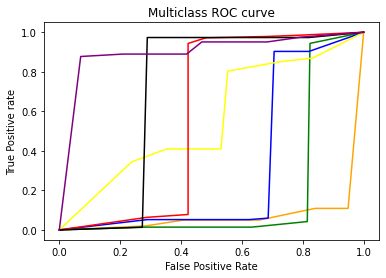

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_labels, y_pred_knn, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0],color='orange', label='Class airplane vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label='Class bicycle vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label='Class boat vs Rest')
plt.plot(fpr[3], tpr[3],color='yellow', label='Class motorbus vs Rest')
plt.plot(fpr[4], tpr[4],color='red', label='Class motorcycle vs Rest')
plt.plot(fpr[5], tpr[5],color='black', label='Class seaplane vs Rest')
plt.plot(fpr[6], tpr[6],color='purple', label='Class truck vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

###model: SVC

In [ ]:
precision= precision_score(test_labels,  y_pred_svc,average=None)
recall= recall_score(test_labels,  y_pred_svc,average=None)

labels=['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane', 'truck']
df_svc = pd.DataFrame({'precision':precision,'recall':recall, 'labels':labels})
df_svc

,precision,recall,labels
0,0.850000,0.841584,airplane
1,0.955224,0.901408,bicycle
2,0.871429,0.910448,boat
3,0.825000,0.540984,motorbus
4,0.964029,0.950355,motorcycle
5,1.000000,0.973333,seaplane
6,0.796791,0.914110,truck


Text(0, 0.5, 'True Positive rate')

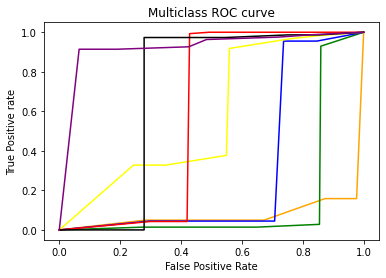

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_labels, y_pred_svc, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0],color='orange', label='Class airplane vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label='Class bicycle vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label='Class boat vs Rest')
plt.plot(fpr[3], tpr[3],color='yellow', label='Class motorbus vs Rest')
plt.plot(fpr[4], tpr[4],color='red', label='Class motorcycle vs Rest')
plt.plot(fpr[5], tpr[5],color='black', label='Class seaplane vs Rest')
plt.plot(fpr[6], tpr[6],color='purple', label='Class truck vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

In [ ]:
# In our case:
# if a truck/motorbus is classified as bicycle/motorcycle and is allowed to pass the bridge then it can cause casualties and will be very dangerous. But if motorcycles/bicycles
# are classified as something else and allowed then it won't cause much problem.

# So, precision/recall -> motorcycles and bicycles should have greater precision while motorbus and truck should have better recall.

# while analyzing the confusion matrix also :
# for KNN -> 2 trucks and 1 motorbus are classified as bicycles while none of them have been classified as motorcycles. (total4)
# for SVC ->  2 trucks,1 motorbus classified as bicycle and 2 trucks,3motorbus are classified as motorcycles (total8) 

# according to this our KNN model would be better in this case.

e) Find the Micro and Macro F1 Score of both of your models and comment on
which is better and why.


###for KNN

In [ ]:
from sklearn.metrics import f1_score

f1_macro_knn=f1_score(test_labels, y_pred_knn, average='macro')
f1_micro_knn=f1_score(test_labels, y_pred_knn, average='micro')
print("macro F1 Score: ",f1_macro_knn)
print("micro F1 Score: ",f1_micro_knn)

macro F1 Score:  0.8181880387784418
micro F1 Score:  0.8418230563002682


###for SVC

In [ ]:
f1_macro_svc=f1_score(test_labels, y_pred_svc, average='macro')
f1_micro_svc=f1_score(test_labels, y_pred_svc, average='micro')
print("macro F1 Score: ",f1_macro_svc)
print("micro F1 Score: ",f1_micro_svc)

macro F1 Score:  0.8754260757437416
micro F1 Score:  0.886058981233244


In [ ]:
# micro gives better accuracy. 
# Moreover, choosing between the both, it also depends on our objective ->  if the class is imbalanced and we care about a particular class, For eg class A is rare, 
# but it’s way important, then ‘macro’ should be a better choice because it treats each class equally. 
# In a multi-class classification, micro-average is preferable if you suspect there might be a class imbalance and no preference is for a particular class

### 7. Write a function to create a random 3x3 captcha matrix and ask the user to label the class with maximum number of examples. Estimate how often your best model will be able to solve the captcha problem correctly.


In [ ]:
def convert(arr, N):
    ans=[]
    mp = {}
     
    mp[0] = "aiplane"
    mp[1] = "bicycle"
    mp[2] = "boat"
    mp[3] = "motorbus"
    mp[4] = "motorcycle"
    mp[5] = "seaplane"
    mp[6] = "truck"
 
    for i in range(N):
        ans.append(mp[arr[i]])
    return ans

In [ ]:
rimg_list=[]
rlabel_list=[]
for i in range(9):
  x=random.randint(0,len(testing_data))
  rimg_list.append(testing_data[x])
  rlabel_list.append(testing_labels[x])

In [ ]:
rimg_flat = []
for x in range(len(rimg_list)):
  rimg_flat.append(rimg_list[x].flatten())

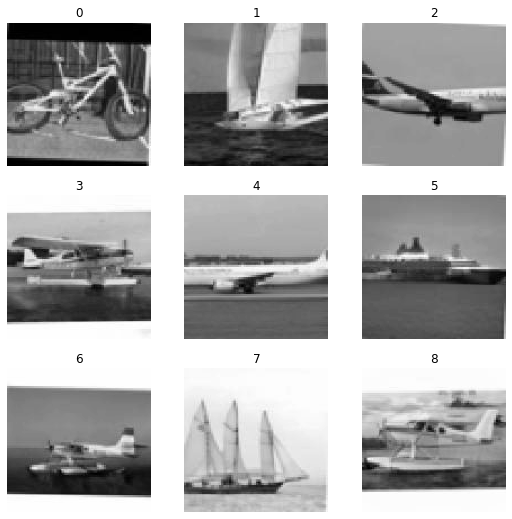

In [ ]:
fig = plt.figure(figsize=(9, 9))
rows=3
columns=3

for i in range(1, 10): 
    fig.add_subplot(rows, columns, i)
    plt.title(i-1)
    plt.imshow(Image.fromarray(rimg_list[i-1]),cmap='gray')
    plt.axis('off')


In [ ]:
pred=svc_final.predict(rimg_flat)
lst=convert(pred, len(pred));
print('classes predicted by the model: ',lst)
print('actual classes: ',rlabel_list)

print()

classes predicted by the model:  ['bicycle', 'boat', 'aiplane', 'seaplane', 'boat', 'aiplane', 'seaplane', 'boat', 'seaplane']
actual classes:  ['bicycle', 'boat', 'airplane', 'seaplane', 'airplane', 'boat', 'seaplane', 'boat', 'seaplane']



In [ ]:
from statistics import mode

In [ ]:
print('predicted: ',Counter(lst))
print()
print('actual: ',Counter(rlabel_list))
max_pre=max(lst,key=lst.count)
max_act=max(rlabel_list,key=rlabel_list.count)

predicted:  Counter({'boat': 3, 'seaplane': 3, 'aiplane': 2, 'bicycle': 1})

actual:  Counter({'boat': 3, 'seaplane': 3, 'airplane': 2, 'bicycle': 1})


In [ ]:
# after running the code 30 times, I found that 23 times out model predicted the correct class which was accouring the most in our model. ie. max_pre == max_act
# So we can say, out of 30 times -> our model was correct 23 tiimes.
# Thus the accuracy of correct predictions wouldbe 76%

## Part B: Ensemble Models

You started a Car Selling business and you are giving recommendations to people for buying cars.

We have provided a dataset to help you start your business.


Dataset: https://github.com/sarang-iitb/Car_Condition_evaluation_dataset


Now, your job is to train a robust model and we will test how good you are on the test set. 

In [ ]:
# get the dataset
!git clone 'https://github.com/sarang-iitb/Car_Condition_evaluation_dataset'

Cloning into 'Car_Condition_evaluation_dataset'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


### Data Preparation: Perform necessary transformations on the input dataset to prepare it for ML model training.

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/Car_Condition_evaluation_dataset/training_data.csv")
test = pd.read_csv("/content/Car_Condition_evaluation_dataset/testing_data.csv")

In [ ]:
print("shape: ",train.shape)
print(train.info())
print(train.isnull().sum())

shape:  (1554, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Buying_Cost          1554 non-null   object
 1   Maintainance_Cost    1554 non-null   object
 2   Number_of_doors      1554 non-null   object
 3   Number_of_Passenger  1554 non-null   object
 4   Luggage_Space        1554 non-null   object
 5   Safety_Features      1554 non-null   object
 6   How_is_the_deal      1554 non-null   object
dtypes: object(7)
memory usage: 85.1+ KB
None
Buying_Cost            0
Maintainance_Cost      0
Number_of_doors        0
Number_of_Passenger    0
Luggage_Space          0
Safety_Features        0
How_is_the_deal        0
dtype: int64


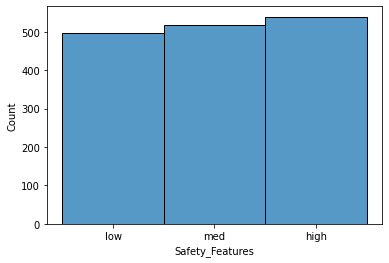

In [ ]:
sns.histplot(data=train,x="Safety_Features",kde=False)

In [ ]:
train2=train.copy()
test2=test.copy()

In [ ]:
print('Buying_Cost: ',train2['Buying_Cost'].unique())
print('Maintainance_Cost: ',train2['Maintainance_Cost'].unique())
print('Number_of_doors: ',train2['Number_of_doors'].unique())
print('Number_of_Passenger: ',train2['Number_of_Passenger'].unique())
print('Luggage_Space: ',train2['Luggage_Space'].unique())
print('Safety_Features: ',train2['Safety_Features'].unique())
print('How_is_the_deal: ',train2['How_is_the_deal'].unique())

Buying_Cost:  ['vhigh' 'med' 'high' 'low']
Maintainance_Cost:  ['med' 'vhigh' 'high' 'low']
Number_of_doors:  ['2' '5more' '3' '4']
Number_of_Passenger:  ['4' '2' 'more']
Luggage_Space:  ['small' 'med' 'big']
Safety_Features:  ['low' 'med' 'high']
How_is_the_deal:  ['Bad_deal' 'Nice_deal']


In [ ]:
train2=train2.replace({'Buying_Cost':{'vhigh':3, 'high':2 ,'med':1 ,'low':0}})
train2=train2.replace({"Maintainance_Cost":   {"low": 0, "med": 1, "high": 2, "vhigh": 3}})
train2=train2.replace({"Number_of_doors":   {"2": 0, "3": 1, "4": 2, "5more": 3}})
train2=train2.replace({"Number_of_Passenger":   {"2": 0, "4": 1, "more": 2}})
train2=train2.replace({"Luggage_Space":   {"small": 0, "med": 1, "big": 2}})
train2=train2.replace({"Safety_Features":   {"low": 0, "med": 1, "high": 2}})
train2=train2.replace({"How_is_the_deal":   {"Bad_deal": 0, "Nice_deal": 1}})

test2=test2.replace({'Buying_Cost':{'vhigh':3, 'high':2 ,'med':1 ,'low':0}})
test2=test2.replace({"Maintainance_Cost":   {"low": 0, "med": 1, "high": 2, "vhigh": 3}})
test2=test2.replace({"Number_of_doors":   {"2": 0, "3": 1, "4": 2, "5more": 3}})
test2=test2.replace({"Number_of_Passenger":   {"2": 0, "4": 1, "more": 2}})
test2=test2.replace({"Luggage_Space":   {"small": 0, "med": 1, "big": 2}})
test2=test2.replace({"Safety_Features":   {"low": 0, "med": 1, "high": 2}})
test2=test2.drop('Deal_num',axis=1)

In [ ]:
train.head()

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,vhigh,med,2,4,small,low,Bad_deal
1,vhigh,med,5more,4,small,low,Bad_deal
2,med,vhigh,5more,4,small,low,Bad_deal
3,high,high,3,2,med,med,Bad_deal
4,vhigh,vhigh,5more,4,small,med,Bad_deal


In [ ]:
train2.head()

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,3,1,0,1,0,0,0
1,3,1,3,1,0,0,0
2,1,3,3,1,0,0,0
3,2,2,1,0,1,1,0
4,3,3,3,1,0,1,0


In [ ]:
test2.head()

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,0,0,3,2,2,2
1,0,0,0,0,0,2
2,0,1,3,1,1,0
3,0,0,2,0,2,0
4,0,0,2,0,1,2


In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Buying_Cost          1554 non-null   int64
 1   Maintainance_Cost    1554 non-null   int64
 2   Number_of_doors      1554 non-null   int64
 3   Number_of_Passenger  1554 non-null   int64
 4   Luggage_Space        1554 non-null   int64
 5   Safety_Features      1554 non-null   int64
 6   How_is_the_deal      1554 non-null   int64
dtypes: int64(7)
memory usage: 85.1 KB


In [ ]:
trainY=train2['How_is_the_deal']
train2=train2.drop('How_is_the_deal',axis=1)

print(trainY)
train2.head()

0       0
1       0
2       0
3       0
4       0
       ..
1549    0
1550    0
1551    0
1552    0
1553    1
Name: How_is_the_deal, Length: 1554, dtype: int64


,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,3,1,0,1,0,0
1,3,1,3,1,0,0
2,1,3,3,1,0,0
3,2,2,1,0,1,1
4,3,3,3,1,0,1


### Ensemble Model: Train any ensemble model of your choice combining your favorite models. In particular, we would like you to try both bagging and boosting.
* Bag of models of your choice
* Adaboost or XGBoost


###Bag of models 

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(train2, trainY, test_size = 0.25, random_state = 22)

In [ ]:
#using decision tree classifier
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(x_train_split,y_train_split)

y_pred = dtree.predict(x_test_split)

print("DTREE Train data accuracy:",accuracy_score(y_train_split, dtree.predict(x_train_split)))
print("DTREE Test data accuracy:",accuracy_score(y_test_split, y_pred))

DTREE Train data accuracy: 1.0
DTREE Test data accuracy: 0.9948586118251928


In [ ]:
dtree_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                          n_estimators = 100,
                          random_state = 22)
dtree_model.fit(x_train_split, y_train_split)
  
print("Train data accuracy:",accuracy_score(y_train_split, dtree_model.predict(x_train_split)))
print("Test data accuracy:",accuracy_score(y_test_split, dtree_model.predict(x_test_split)))


Train data accuracy: 1.0
Test data accuracy: 0.9948586118251928


In [ ]:
#using SVC classifier
from sklearn.svm import SVC 
svc= SVC(kernel='linear', random_state=0)  
svc.fit(x_train_split, y_train_split) 

print("SVC Train data accuracy:",accuracy_score(y_train_split, svc.predict(x_train_split)))
print("SVC Test data accuracy:",accuracy_score(y_test_split, svc.predict(x_test_split)))

SVC Train data accuracy: 0.9862660944206009
SVC Test data accuracy: 0.9820051413881749


In [ ]:
svc_model = BaggingClassifier(base_estimator = SVC(kernel='linear'),
                          n_estimators = 10,
                          random_state = 22,
                          )
svc_model.fit(x_train_split, y_train_split)
  
print("Train data accuracy:",accuracy_score(y_train_split, svc_model.predict(x_train_split)))
print("Test data accuracy:",accuracy_score(y_test_split, svc_model.predict(x_test_split)))


Train data accuracy: 0.9854077253218884
Test data accuracy: 0.9794344473007712


In [ ]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier  
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")

rf.fit(x_train_split, y_train_split)  

print("RF Train data accuracy:",accuracy_score(y_train_split, rf.predict(x_train_split)))
print("RF Test data accuracy:",accuracy_score(y_test_split, rf.predict(x_test_split)))

RF Train data accuracy: 0.9991416309012876
RF Test data accuracy: 0.9948586118251928


In [ ]:
rf_model = BaggingClassifier(base_estimator = RandomForestClassifier(criterion="entropy"),
                          n_estimators = 10,
                          random_state = 22,
                          )
rf_model.fit(x_train_split, y_train_split)
  
print("Train data accuracy:",accuracy_score(y_train_split, rf_model.predict(x_train_split)))
print("Test data accuracy:",accuracy_score(y_test_split, rf_model.predict(x_test_split)))


Train data accuracy: 1.0
Test data accuracy: 0.9922879177377892


###Adaboost or XGBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
svc_ad =AdaBoostClassifier(n_estimators=50, base_estimator=SVC(probability=True,kernel='linear'),learning_rate=1, random_state=0)

svc_ad.fit(x_train_split, y_train_split) 

print("SVC Train data accuracy:",accuracy_score(y_train_split, svc_ad.predict(x_train_split)))
print("SVC Test data accuracy:",accuracy_score(y_test_split, svc_ad.predict(x_test_split)))

SVC Train data accuracy: 0.91931330472103
SVC Test data accuracy: 0.9331619537275064


In [ ]:
dtree_ad =AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(),learning_rate=1, random_state=0)

dtree_ad.fit(x_train_split, y_train_split) 

print("DTREE Train data accuracy:",accuracy_score(y_train_split, dtree_ad.predict(x_train_split)))
print("DTREE Test data accuracy:",accuracy_score(y_test_split, dtree_ad.predict(x_test_split)))

DTREE Train data accuracy: 1.0
DTREE Test data accuracy: 0.9948586118251928


In [ ]:
rf_ad =AdaBoostClassifier(n_estimators=50, base_estimator=RandomForestClassifier(criterion="entropy"),learning_rate=1, random_state=0)

rf_ad.fit(x_train_split, y_train_split) 

print("RF Train data accuracy:",accuracy_score(y_train_split, rf_ad.predict(x_train_split)))
print("RF Test data accuracy:",accuracy_score(y_test_split, rf_ad.predict(x_test_split)))

RF Train data accuracy: 1.0
RF Test data accuracy: 0.9922879177377892


##For test data

In [ ]:
test2.head()

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,0,0,3,2,2,2
1,0,0,0,0,0,2
2,0,1,3,1,1,0
3,0,0,2,0,2,0
4,0,0,2,0,1,2


In [ ]:
from sklearn.ensemble import AdaBoostClassifier #for classifier
from sklearn import metrics
abc =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=0.1)

# Train Adaboost Classifer
model = abc.fit(train2, trainY)

#Predict the response for test dataset
y_pred = model.predict(test2)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [ ]:
svc_model2 = BaggingClassifier(base_estimator = SVC(kernel='linear'),
                          n_estimators = 50,
                          random_state = 22,
                          )
svc_model2.fit(train2, trainY)
y_pred_test=svc_model2.predict(test2)
print(y_pred_test)

[1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1
 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0]


In [ ]:
ans_num=test['Deal_num']

In [ ]:
ans=pd.DataFrame({'Deal_num':ans_num,'How_is_the_deal':y_pred_test})
ans=ans.replace({'How_is_the_deal':{0:'Bad_deal', 1:'Nice_deal'}})
ans.head()

,Deal_num,How_is_the_deal
0,0,Nice_deal
1,1,Nice_deal
2,2,Bad_deal
3,3,Nice_deal
4,4,Nice_deal


In [ ]:
ans.to_csv('submission_12041240.csv')